# TP : graphique barplot - nombre d'achats par mois

In [5]:
import pandas as pd
import numpy as np
import os
import s3fs
import re
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
from datetime import datetime

In [2]:
# Create filesystem object
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})

In [3]:
## Evolution vente 

# Importation
# Chargement des données temporaires
BUCKET = "projet-bdc2324-team1"
FILE_KEY_S3 = "0_Temp/Company 1 - Purchases.csv"
FILE_PATH_S3 = BUCKET + "/" + FILE_KEY_S3

with fs.open(FILE_PATH_S3, mode="rb") as file_in:
    purchases = pd.read_csv(file_in, sep=",")

In [27]:
purchases

ticket_id  customer_id  purchase_id  event_type_id   supplier_name  \
0         13070859        48187      5107462              4  vente en ligne   
1         13070860        48187      5107462              4  vente en ligne   
2         13070861        48187      5107462              4  vente en ligne   
3         13070862        48187      5107462              4  vente en ligne   
4         13070863        48187      5107462              4  vente en ligne   
...            ...          ...          ...            ...             ...   
1826667   20662815      1256135      8007697              5  vente en ligne   
1826668   20662816      1256136      8007698              5  vente en ligne   
1826669   20662817      1256136      8007698              5  vente en ligne   
1826670   20662818      1256137      8007699              5  vente en ligne   
1826671   20662819      1256137      8007699              5  vente en ligne   

                    purchase_date type_of_ticket_name  amount  \
0       2018-12-28 14:47:50+00:00             Atelier     8.0   
1       2018-12-28 14:47:50+00:00             Atelier     4.0   
2       2018-12-28 14:47:50+00:00             Atelier     4.0   
3       2018-12-28 14:47:50+00:00             Atelier     4.0   
4       2018-12-28 14:47:50+00:00             Atelier     4.0   
...                           ...                 ...     ...   
1826667 2023-11-08 17:23:54+00:00             Atelier    11.0   
1826668 2023-11-08 18:32:18+00:00             Atelier    11.0   
1826669 2023-11-08 18:32:18+00:00             Atelier    11.0   
1826670 2023-11-08 19:30:28+00:00             Atelier    11.0   
1826671 2023-11-08 19:30:28+00:00             Atelier    11.0   

                children  is_full_price      name_event_types name_facilities  \
0        pricing_formula          False      spectacle vivant           mucem   
1        pricing_formula          False      spectacle vivant           mucem   
2        pricing_formula          False      spectacle vivant           mucem   
3        pricing_formula          False      spectacle vivant           mucem   
4        pricing_formula          False      spectacle vivant           mucem   
...                  ...            ...                   ...             ...   
1826667  pricing_formula          False  offre muséale groupe           mucem   
1826668  pricing_formula          False  offre muséale groupe           mucem   
1826669  pricing_formula          False  offre muséale groupe           mucem   
1826670  pricing_formula          False  offre muséale groupe           mucem   
1826671  pricing_formula          False  offre muséale groupe           mucem   

           name_categories            name_events  name_seasons  
0        indiv prog enfant  l'école des magiciens          2018  
1        indiv prog enfant  l'école des magiciens          2018  
2        indiv prog enfant  l'école des magiciens          2018  
3        indiv prog enfant  l'école des magiciens          2018  
4        indiv prog enfant  l'école des magiciens          2018  
...                    ...                    ...           ...  
1826667   indiv entrées tp                    NaN          2023  
1826668   indiv entrées tp                    NaN          2023  
1826669   indiv entrées tp                    NaN          2023  
1826670   indiv entrées tp                    NaN          2023  
1826671   indiv entrées tp                    NaN          2023  

[1826672 rows x 15 columns]

In [84]:
purchases['purchase_date'] = pd.to_datetime(purchases['purchase_date'])

purchases_filtered = purchases[purchases['event_type_id'] == 5]

In [86]:
# création de la table pr faire le graphique

purchases_graph = purchases_filtered[['purchase_id', 'purchase_date']].drop_duplicates()

purchases_graph["fake_category"] = np.random.choice([0, 1], size=purchases_graph.shape[0], p = [0.3, 0.7])

purchases_graph['month'] = purchases['purchase_date'].dt.strftime('%Y-%m')

# purchases_graph = purchases_graph.groupby('month')['purchase_id'].count().reset_index()
purchases_graph = purchases_graph.groupby(['month','fake_category'])['purchase_id'].count().reset_index()

purchases_graph['month'] = pd.to_datetime(purchases_graph['month'])

purchases_graph

month  fake_category  purchase_id
0   2013-06-01              1            1
1   2013-07-01              1            1
2   2013-09-01              0            2
3   2013-10-01              1            1
4   2013-11-01              0            2
..         ...            ...          ...
196 2023-09-01              1         6900
197 2023-10-01              0         3621
198 2023-10-01              1         8313
199 2023-11-01              0          945
200 2023-11-01              1         2268

[201 rows x 3 columns]

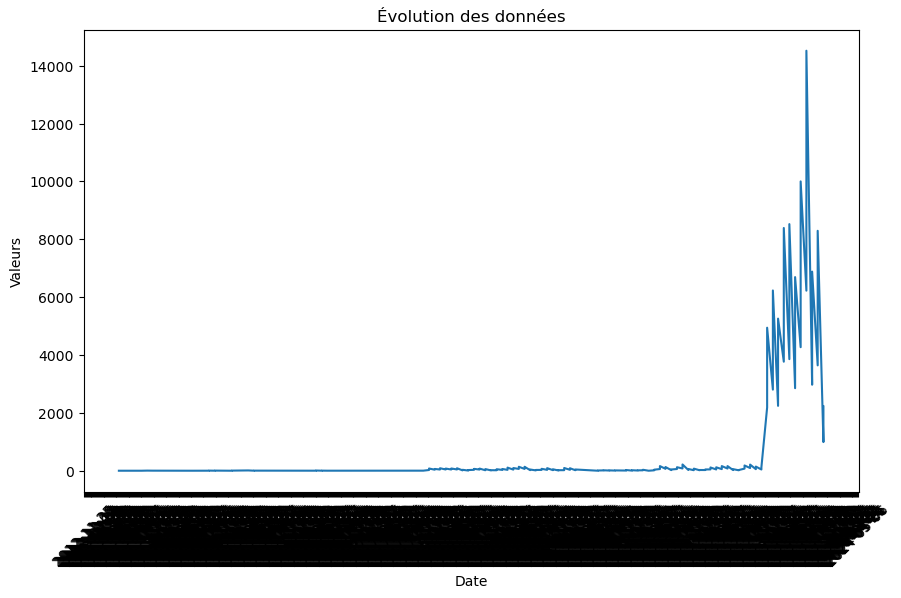

In [83]:
# Créer le graphique (a changé ! le bon est le barplot qui vient après)
plt.figure(figsize=(10, 6))
plt.plot(purchases_graph['month'], purchases_graph['purchase_id'])

# Définir le format de l'axe des x en fonction des dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5)) # Ajustez l'intervalle selon vos besoins

# Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45)


# Titres et labels
plt.title('Évolution des données')
plt.xlabel('Date')
plt.ylabel('Valeurs')

plt.show()

## TP : second graphique - barplot

In [88]:
purchases_graph[purchases_graph["purchase_id"]>100] 

month  fake_category  purchase_id
96  2019-03-01              1          102
100 2019-05-01              1          140
102 2019-06-01              1          131
142 2021-06-01              1          157
144 2021-07-01              1          145
148 2021-09-01              1          123
150 2021-10-01              1          220
160 2022-03-01              1          112
162 2022-04-01              1          107
164 2022-05-01              1          164
166 2022-06-01              1          158
172 2022-09-01              1          178
174 2022-10-01              1          218
176 2022-11-01              1          137
178 2022-12-01              1          107
179 2023-01-01              0         2052
180 2023-01-01              1         5079
181 2023-02-01              0         2684
182 2023-02-01              1         6350
183 2023-03-01              0         2196
184 2023-03-01              1         5304
185 2023-04-01              0         3595
186 2023-04-01              1         8563
187 2023-05-01              0         3727
188 2023-05-01              1         8653
189 2023-06-01              0         2904
190 2023-06-01              1         6641
191 2023-07-01              0         4247
192 2023-07-01              1        10022
193 2023-08-01              0         6146
194 2023-08-01              1        14593
195 2023-09-01              0         2954
196 2023-09-01              1         6900
197 2023-10-01              0         3621
198 2023-10-01              1         8313
199 2023-11-01              0          945
200 2023-11-01              1         2268

à partir de 2023, rupture : passage de plusieurs centaines à + de 7k ventes (et 3k en nov 2023) - on prend slt 2023

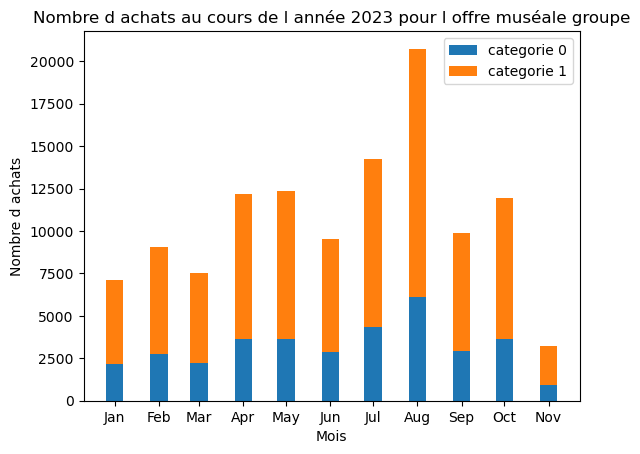

In [76]:
# début du graphique

purchases_graph_used = purchases_graph[purchases_graph["month"] >= datetime(2023,1,1)]
purchases_graph_used_0 = purchases_graph_used[purchases_graph_used["fake_category"]==0]
purchases_graph_used_1 = purchases_graph_used[purchases_graph_used["fake_category"]==1]


# Création du barplot
plt.bar(purchases_graph_used_0["month"], purchases_graph_used_0["purchase_id"], width=12, label = "categorie 0")
plt.bar(purchases_graph_used_0["month"], purchases_graph_used_1["purchase_id"], 
        bottom = purchases_graph_used_0["purchase_id"], width=12, label = "categorie 1")


# commande pr afficher slt
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))


# Ajout de titres et d'étiquettes
plt.xlabel('Mois')
plt.ylabel('Nombre d achats')
plt.title('Nombre d achats au cours de l année 2023 pour l offre muséale groupe')
plt.legend()

# Affichage du barplot
plt.show()